<h1 style = "text-align:center;font-size:25px;color:blu"> 
    Digital Image Processing <br> <br> Assignment – 1
</h1>

|||
|:--:|:--:|
|Name|Ishwar Dayal Nishad|
|Course|B.Sc.(H) Computer Science|
| College Roll No. | 20201458 |  
| Exam Roll No. | 20016570008 |  
| Teacher | Mrs Bhavya Ahuja |

***  

<b>
<font style = "color:#51ef">
Q. 1)    
    
Implement the JPEG compression algorithm. JPEG uses the DCT Transform.  
Create three versions of the algorithm: 

1) Using the standard DCT Transform  

2) Using Fourier Transform  

3) Using Wavelet Transform  

Compare the performance of the three versions after application of the compression scheme on an image. The comparison will be on the basis of the standard compression performance indices used. 

(Paste your code and output in the file to be submitted)

</font>  
    
***  
    
Ans )  

In JPEG compression, we do following steps :
   
### **Compression**
    
* Take the input image.
    
    
* If image is RGB then transform it to YCBCR mode.
   - Y  = Luminance
   - CB = Color Blueness
   - CR = Color Redness
   - Apply downsampling to CB & CR matrix.
    
    
* Convert Image to 8 x 8 or 16 x 16 blocks.
    
    
* Change block range from [0 255] to [-127 128].
    
    
* Apply transform to blocks, such as
    - DCT (Discrete Cosine Trsnform)
    - FFT (Fast Fourier Tranform) 
    
    
* Do quantization of the blocks by dimensions.
    

* Do zigzag scanning & tranform 8x8 block to 1x64 array.
    
    
* Do Entropy Encoding like
    - RLE (Run Length Encoding)
    - Huffman Encoding

    
*  Now you will get the compressed format of the image.

Note :- Compressed format can be text file/binary file/matrix.
  
    
### **Decompression**
    
* Take the compressed format of image.

    
* Perform Decoding on every array.
    

* Arrange array into zigzag patterned block.
    

* Do inverse quantization of the blocks by dimensions.
    
    
* Apply inverse tranformation & change the range of block.
    
    
* Recreate the image from the blocks by dimensions.
    
    
### Steps :    
   
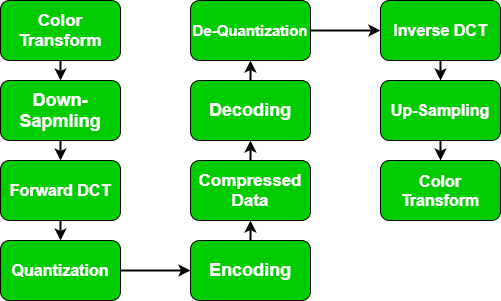

    
***  
    
Code )
      
</b>

In [32]:
                                      // Quantization

funcprot(0);

function q_block = quantize(iblock, channel, qf, enc)
    /*
    // @args
    //      iblock = image block of size 8 x 8
    //      channel = image channels if its RGB
    //      qf = quality factor
    //      enc = encoding boolean
    //
    // @returns
    //      qblock = quantized block
    //  
    // @description
    //      Perform quantization or dequantization on the 8 x 8 block
    // of image & round off the resultant double matrix
    */
    
    if ~exists('channel', 'local') then channel = 1; end
    if ~exists('qf', 'local') then qf = 1; end
    if ~exists('enc', 'local') then enc = %t; end
    
    // Luminance Matrix
    Qy = [16 11 10 16 24 40 51 61;
         12 12 14 19 26 28 60 55 ;
         14 13 16 24 40 57 69 56 ;
         14 17 22 29 51 87 80 62 ;
         18 22 37 56 68 109 103 77;
         24 35 55 64 81 104 113 92;
         49 64 78 87 103 121 120 101;
         72 92 95 98 112 100 103 99]; 
    
    // Chrominance Matrix
    Qc = [17 18 24 47 99 99 99 99;
         18 21 26 66 99 99 99 99;
         24 26 56 99 99 99 99 99;
         47 66 99 99 99 99 99 99;
         99 99 99 99 99 99 99 99;
         99 99 99 99 99 99 99 99;
         99 99 99 99 99 99 99 99;
         99 99 99 99 99 99 99 99];
     
     Qy = Qy.*qf;
     Qc = Qc.*qf;
     
     if enc then
         if channel == 1 then 
             q_block = round(iblock./Qy);
         else 
             q_block = round(iblock./Qc);
         end
     else
        if channel == 1 then 
            q_block = iblock.*Qy;
         else 
             q_block = iblock.*Qc;
         end
     end
endfunction

                                       // zigzag scan

function arr = zigzag(block)
    /*
    // @args
    //      block = 2D matrix of double / constant
    //
    // @returns
    //      arr = 1D array / vector
    //
    // @description
    //      pick elements from matrix block & save it in 
    // 1D array in linear format.
    */
    
    [n_row, n_col] = size(block);
    c_row = 1; c_idx = 1; c_col = 1;
    arr = zeros(1, n_row * n_col);
    
    while c_row <= n_row & c_col <= n_col
        if modulo(c_row + c_col, 2) == 0 
            then
            if c_row == 1 & c_col <> n_col 
                then
                arr(c_idx) = block(c_row, c_col); // insert element
                c_idx = c_idx + 1; // update index
                c_col = c_col + 1; // right shift on 1st row
                
            elseif c_col == n_col & c_row <> n_row
                then
                arr(c_idx) = block(c_row, c_col); 
                c_idx = c_idx + 1; 
                c_row = c_row + 1; // down shift on last col
             
            else
                arr(c_idx) = block(c_row, c_col); 
                c_idx = c_idx + 1;
                c_row = c_row - 1; c_col = c_col + 1; // diagonal upward shift
            end
            
        else
            if c_col == 1 & c_row <> n_row 
                then
                arr(c_idx) = block(c_row, c_col); // insert element
                c_idx = c_idx + 1; // update index
                c_row = c_row + 1; // down shift on 1st col
                
            elseif c_row == n_row & c_col <> n_col
                then
                arr(c_idx) = block(c_row, c_col); 
                c_idx = c_idx + 1; 
                c_col = c_col + 1; // right shift on last row
             
            else
                arr(c_idx) = block(c_row, c_col); 
                c_idx = c_idx + 1;
                c_row = c_row + 1; c_col = c_col - 1; // diagonal downward shift
            end
        end
        
        if c_row == n_row & c_col == n_col then 
            arr(c_idx) = block(c_row, c_col);
            break;
        end
    end
    
    for i = 1:n_row*n_col
        if arr(i) <> 0 then
            c_idx = i;
        end
    end
    arr = arr(1:c_idx);
endfunction

                                    // Inverse zigzag scan

function [block] = izigzag(arr, n_row, n_col)
    /*
    // @args
    //      arr = 1D array / vector of size(1, n_row * n_col)
    //      n_row = total no. of rows
    //      n_col = total no. of cols
    //
    // @returns
    //      block = 2D matrix of size(n_row, n_col)
    //
    // @description
    //      pick elements from 1D zigzaged array & save it in 
    //  M x N matrix block.
    */
    c_row = 1; c_idx = 1; c_col = 1;
    block = zeros(n_row, n_col);
    arr = resize_matrix(arr, 1, n_row*n_col);
    
    while c_row <= n_row & c_col <= n_col
        if modulo(c_row + c_col, 2) == 0 
            then
            if c_row == 1 & c_col < n_col 
                then
                block(c_row, c_col) = arr(c_idx); // insert element
                c_idx = c_idx + 1; // update index
                c_col = c_col + 1; // right shift
                
            elseif c_col == n_col & c_row < n_row
                then
                block(c_row, c_col) = arr(c_idx) 
                c_idx = c_idx + 1; 
                c_row = c_row + 1; // down shift
             
            else
                block(c_row, c_col) = arr(c_idx) 
                c_idx = c_idx + 1;
                c_row = c_row - 1; c_col = c_col + 1; // diagonal upward shift
            end
            
        else
            if c_col == 1 & c_row <> n_row 
                then
                block(c_row, c_col) = arr(c_idx); // insert element
                c_idx = c_idx + 1; // update index
                c_row = c_row + 1; // down shift on 1st col
                
            elseif c_row == n_row & c_col < n_col
                then
                block(c_row, c_col) = arr(c_idx);
                c_idx = c_idx + 1; 
                c_col = c_col + 1; // right shift on last row
             
            else
                block(c_row, c_col) = arr(c_idx);
                c_idx = c_idx + 1;
                c_row = c_row + 1; c_col = c_col - 1; // diagonal downward shift
            end
        end         
        
        if c_row == n_row & c_col == n_col then 
            block(c_row, c_col) = arr(c_idx);
            break;
        end
    end
endfunction

                                    // run length encoding

function out = rle(vec, enc)
    len = length(vec);
    counter=0;  out = []; i=1;
    
    if enc then
         while i <= len
            if vec(i) == 0
               while vec(i) == 0
                counter=counter+1;
                i=i+1;
                if i > len  break; end
               end
                out = [out 0 counter];
                counter=0;
            else
                out = [out vec(i)];
                i=i+1;
            end
        end
    else
        while i<=len
            if vec(i)==0 
                out = [out zeros(1,vec(i+1))];
                i = i + 2;
            else
               out = [out vec(i)];
               i=i+1;
            end
       end
    end
endfunction

                                        // compress

function [img, br, bc, d] = padding(I)
    [r c d] = size(I);
    br = r/8;
    bc = c/8;
    if br <> int(br) then
        br = ceil(br);
    end
    if bc <> int(bc) then
        bc = ceil(bc);
    end
    r = 8*br;
    c = 8*bc;
    for i = 1:d     // zero padding if required
        img(:,:,i) = resize_matrix(I(:,:,i), r, c);
    end
endfunction

function [arr, len] = compress(I, func)
    [img br bc d] = padding(I);
    
    if d > 1 then // channel conversion
        img = rgb2ycbcr(img);
        // Chrominance downsampling
        for i = 2:3
            img(:,:,i) = 2 * round(img(:,:,i)./2);
        end
    end
    
    for k = 1:d
        for i = 1:br
            for j = 1:bc
                ib = double(img(i*8-7:i*8, j*8-7:j*8, k)) - 128;
                t_b = func(ib);
                zcoef = rle(zigzag(quantize(t_b, k)), %t);
                arr{i,j} = zcoef;
            end 
        end
    end
    len = 0;
    for i = 1:br
        for j = 1:bc
            len = len + length(arr{i,j});
        end
    end
endfunction

// Decompression

function img = decompress(comp, br, bc, d, func)
    img = zeros(8*br, 8*bc, d, 'uint8');
    dc_ant = 0;
    for k = 1:d
        for i = 1:br
            for j = 1:bc
                zcoef = rle(comp{i,j}, enc = %f);
                iz = izigzag(zcoef, 8, 8);
                iq_b = quantize(iz, channel = c, enc = %f);
                ib = func(iq_b) + 128;
                img(i*8-7:i*8, j*8-7:j*8, k) = real(ib);
            end
        end
    end
endfunction

// Compression Parameters

function [mse, psnr] = compression_params(oi, ci)
/*
    // @inputs
    //      oi = Original Image Data
    //      ci = Compressed Image Data
    //
    // @returns
    //      mse = Mean Square Error
    //      psnr = Peak Signal to Noise Ratio
    //
    //
    //      for better compression / reconstruction of image 
    //      1. mse should be low.
    //      2. psnr should be high.
    //      
*/
    
    oi = double(oi);
    ci = double(ci);
    [h,w] = size(oi); 

    mse = (sum((oi - ci).^2)/(h*w))^0.5;
    psnr = 20 * log10(255/mse);
endfunction


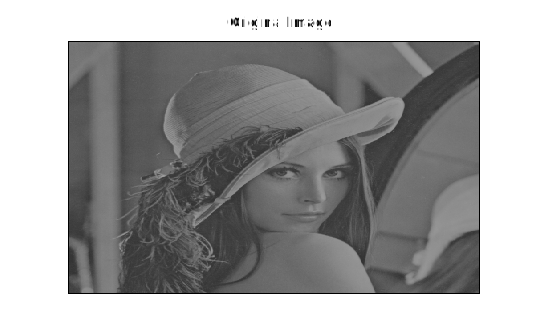

In [33]:
// testing

img = imread(fullpath(getIPCVpath() + 'images/Lena_dark.png'));
[r c d] = size(img);
title('Original Image'), imshow(img);

# 1. DCT Compression Simulation

In [ ]:
// 1. DCT Compression Simulation

[comp_arr, tpix] = compress(img, dct);
img1 = decompress(comp_arr, ceil(r/8), ceil(c/8), d, idct);

In [34]:
[m1 p1] = compression_params(img, img1);
c1 = prod(size(img))/tpix;

In [52]:
printf(" DCT Compression Ratio \t\t: %.2f", c1);
printf(" Redundancy\t\t\t: %.2f",1 - (1/c1));
printf(" Mean Square Root Error \t: %.2f", m1);
printf(" Peak Signal to Noise Ratio \t: %.2f db", p1);


 DCT Compression Ratio 		: 9.44
 Redundancy			: 0.89
 Mean Square Root Error 	: 12.51
 Peak Signal to Noise Ratio 	: 26.19 db


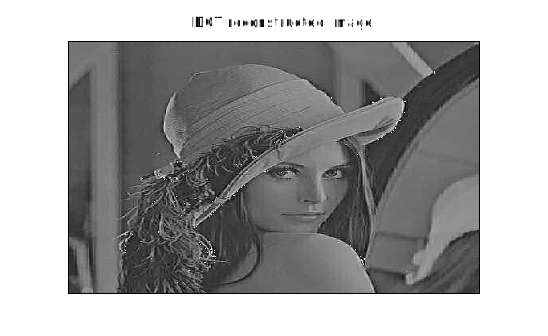

In [36]:
title('DCT reconstructed Image'),imshow(img1);

# 2. FFT Compression Simulation

In [37]:
// 2. FFT Compression Simulation

[comp_ar1, tpix1] = compress(img, fft);
img2 = decompress(comp_ar1, ceil(r/8), ceil(c/8), d, ifft);

In [38]:
[m2 p2] = compression_params(img, img2);
c2 = prod(size(img))/tpix1;

In [51]:
printf(" FFT Compression Ratio \t\t: %.2f", c2);
printf(" Redundancy\t\t\t: %.2f",1 - (1/c2));
printf(" Mean Square Root Error \t: %.2f", m2);
printf(" Peak Signal to Noise Ratio \t: %.2f db", p2);


 FFT Compression Ratio 		: 2.06
 Redundancy			: 0.51
 Mean Square Root Error 	: 9.82
 Peak Signal to Noise Ratio 	: 28.29 db


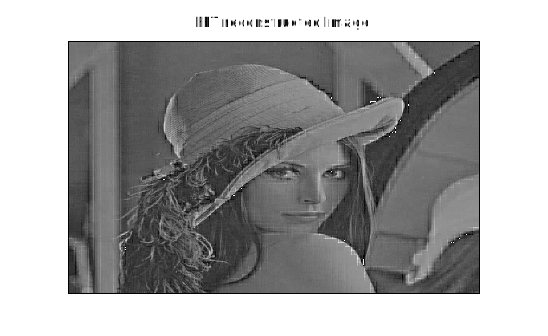

In [40]:
title('FFT reconstructed Image'),imshow(img2);

# 3. Wavelet Compression Simulation

In [142]:
// 3. DWT Compress

function [CA] = wave_compress(img, r, c, level)
    i1 = double(img);
    CA = zeros(r, c, 'uint8');
    
    for i = 1:level
        s = stdev(i1(:));
        [ca ch cv cd] = dwt2(i1, 'haar');
        ca(ca < s) = 0;
        ch(ch < s) = 0;
        cv(cv < s) = 0;
        cd(cd < s) = 0;
        
        i1 = ca;
        CA(1:r/(2^i), 1:c/(2^i)) = ca;
        CA((1 + r/(2^i)):r/(2^(i-1)), 1:c/(2^i)) = cv;
        CA(1:r/(2^i), (1+ c/(2^i)) : c/(2^(i-1))) = ch;
        CA((1+ r/(2^i)):r/(2^(i-1)), (1+ c/(2^i)) : c/(2^(i-1))) = cd;
    end
    /*
    CAA = CA;
    for i = level:-1:1
        ca = CAA(1:r/(2^i), 1:c/(2^i));
        cv = CAA((1 + r/(2^i)):r/(2^(i-1)), 1:c/(2^i));
        ch = CAA(1:r/(2^i), (1+ c/(2^i)) : c/(2^(i-1)));
        cd = CAA((1+ r/(2^i)):r/(2^(i-1)), (1+ c/(2^i)) : c/(2^(i-1)));
        
        i1 = idwt2(ca, ch, cv, cd, 'haar');
        CAA(1:r/2^(i-1), 1:c/2^(i-1)) = i1;
    end
    
    [m p] = compression_params(img,i1);*/
    c = nnz(img)/(nnz(CA));
    title('Decompsite Image at level ' + string(level)), imshow(CA);
    printf("\n Decomposition Level \t\t: %d", level);
    printf("\n DWT Compression Ratio \t\t: %.2f", c);
    printf("\n Redundancy\t\t\t: %.2f",1 - (1/c));
endfunction



 Decomposition Level 		: 1
 DWT Compression Ratio 		: 3.99
 Redundancy			: 0.75


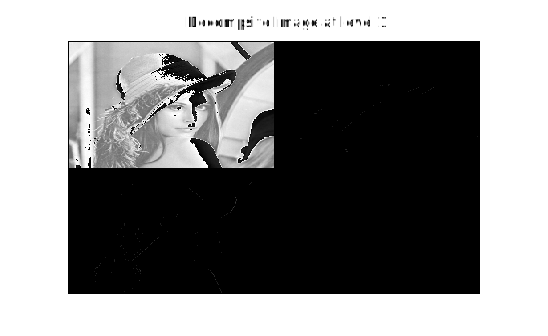

In [143]:
A1 = wave_compress(img, r, c, 1);



 Decomposition Level 		: 2
 DWT Compression Ratio 		: 15.47
 Redundancy			: 0.94


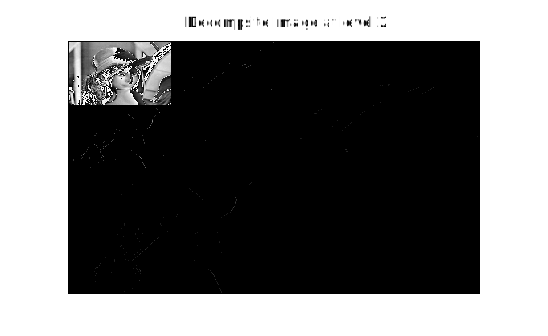

In [146]:
A2 = wave_compress(img, r, c, 2);



 Decomposition Level 		: 3
 DWT Compression Ratio 		: 53.76
 Redundancy			: 0.98


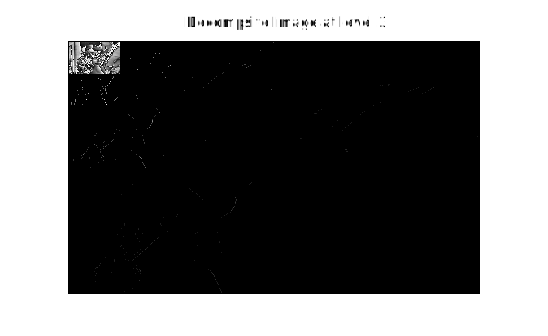

In [145]:
A3 = wave_compress(img, r, c, 3);

***  

<b>
<font style = "color:#51ef">
    
Q2)  
Refer to the paper Sarma, Rituparna, and Yogesh Kumar Gupta. "A comparative study of new and existing segmentation techniques." IOP Conference Series: Materials Science and Engineering. Vol. 1022. No. 1. IOP Publishing, 2021. It presents a number of image segmentation techniques; select any of these and describe the working of the algorithm. Implement and apply the algorithm on an image. 
    
(Paste your code and output in the file to be submitted)

</font>  
    
***  
Ans )
    
<font style = "color:#235bbb"> <u> Segmentation Technique : Otsu Thresholding </u></font>

<font style = "color:#235bbb"> <u> Otsu’s method: </u> </font> 
    
    Otsu’s thresholding technique is a classification-based method which searches for the threshold that minimizes the intra-class variance, defined as a weighted sum of variances of the two classes. It is the most popular method of binarizing a grayscale image. Otsu’s algorithms simply assume that a grayscale image consists of two types of pixels. Foreground and background pixels. It divides all the pixels into two clusters. It minimises the intra-cluster variation by maximising the inter-cluster variance. Finally, it returns a single intensity value which is called a threshold value. This threshold value divides the two clusters of pixels. All pixels of one cluster are assigned intensity value 0 and pixels of the second cluster are assigned value 1. Thus, it binarises the grayscale image.
    
    
***    
    
![Otsu%E2%80%99s+Methold+Otsu%E2%80%99s+thresholding+method+is+based+on+selecting+the+lowest+point+between+two+classes+%28peaks%29.%20(1).jpg](attachment:Otsu%E2%80%99s+Methold+Otsu%E2%80%99s+thresholding+method+is+based+on+selecting+the+lowest+point+between+two+classes+%28peaks%29.%20(1).jpg)
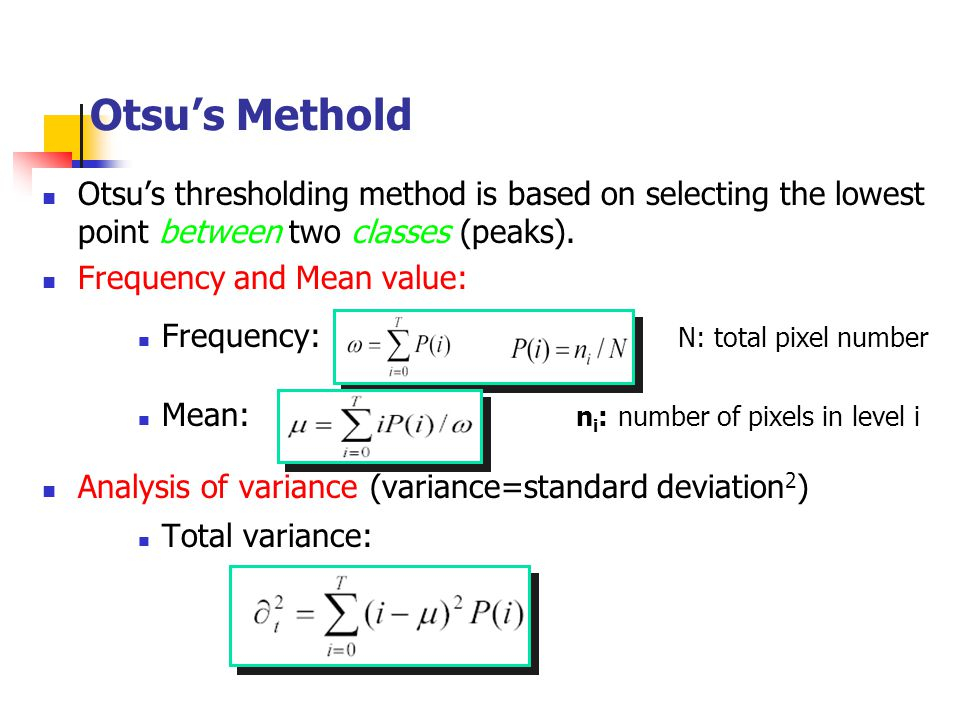

***  

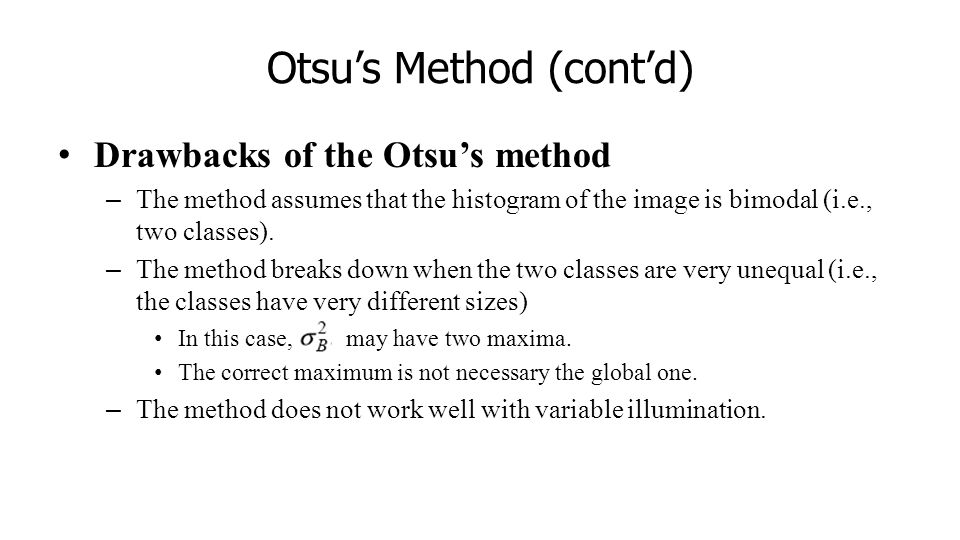

***  
Code )

In [1]:
// Otsu Thresholding Function

function level = otsu_threshold(I)

// Calculate Otsu's Global threshold value
//    
// @args
//    I : Source Image
//
// @returns
//    level : Otsu's threshold value
//
// @description
//    The function uses Otsu's method, which chooses the threshold to
//    minimize the intraclass variance of the black and white pixels.     
//    If the image is RGB convert it to grayscale

sz = size(I);
if (length(sz)==3)
    I = rgb2gray(I);
end

// Calculation of the normalized histogram
n = 256;
h = imhist(I(:), n);        
h = h/(length(I(:)) + 1);

// Calculation of the cumulated histogram and the mean values
w = cumsum(h);
mu = zeros(n, 1); 
mu(1) = h(1);
for i=2:n
    mu(i) = mu(i-1) + i*h(i);
end    

// Initialisation of the values used for the threshold calculation
level = find (h > 0, 1);
w0 = w(level);
w1 = 1-w0;
mu0 = mu(level)/w0;
mu1 = (mu($)-mu(level))/w1;
maxval = w0*w1*(mu1-mu0)*(mu1-mu0);

// For each step of the histogram
// calculation of the threshold and storing of the maximum
for i = find (h > 0)
    w0 = w(i);
    w1 = 1-w0;
    mu0 = mu(i)/w0;
    mu1 = (mu($)-mu(i))/w1;
    s = w0*w1*(mu1-mu0)*(mu1-mu0);
    if (s > maxval)
        maxval = s;
        level = i;
    end
end

// Normalisation of the threshold        
level = level/n;
endfunction

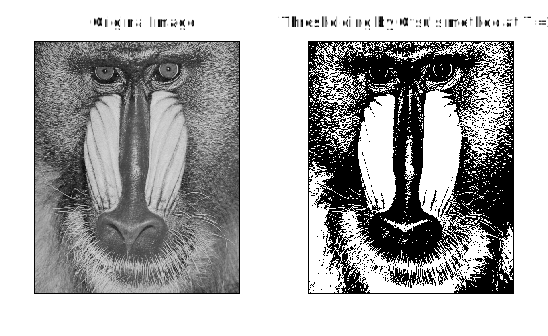

In [5]:
// Testing

img = imread(fullpath(getIPCVpath() + 'images/baboon.png'));
img = rgb2gray(img);
subplot(121), title('Original Image'), imshow(img);

th = otsu_threshold(img);
bw = im2bw(img, th);
subplot(122);
title('Thresholding by Otsu''s method at T =' + string(th*256));
imshow(bw);

***  

<b>
<font style = "color:#51ef">
    
Q3)  
Refer to any recent research publication on low pass/high pass filtering on images. Describe the algorithm used. Present an analysis of the same and enumerate its strength and weaknesses.  

Extra points for implementing the algorithm used. Papers can be found at Google Scholar.


</font>  
    
***  
Ans )

<font style = "color:#235bbb"> <u> Paper Name : </u> </font>  
    
Satpathy, S. K., Panda, S., Nagwanshi, K. K., & Ardil, C. (2010). Image restoration in non-linear filtering domain using MDB approach. World Academy of Science, Engineering and Technology, 37, 761-765
        
    
<font style = "color:#235bbb"> <u> Technique : </u> </font> 
    
Image Restoration in Non-Linear Filtering Domain 
    
using MDB (MinMax Detector Based) approach
    
    
    
    
<font style = "color:#235bbb"> <u> Proposed Algorithm : </u> </font> 
    
    
Step 1. Take corrupted image (X). 
    
Step 2. Take a 3 x 3 window (W). 
    
Let the center pixel be the test pixel. 
    
Step 3. Shift the window row wise then column wise
    
        to cover the entire pixel in the image & repeat Step4 and Step5. 
    
Step 4. If (test pixel <= min) OR (test pixel >= max) 
        
         then the test pixel is corrupted. 
    
Step 5. If the test pixel is corrupted apply median 

         filter to the test filter in the window W. 
    
Step 6. Stop. 
    
    
<font style = "color:#235bbb"> <u> Strength : </u> </font> 
 
    
* Good impulse noise attenuation
    

* A little faster approach from standard median filter
    

* Stable results
    
    
<font style = "color:#235bbb"> <u> Weakness : </u> </font> 
 
    
* Not affective to other noises
    

* Lost of information on some images 


    
    
***  
Code )

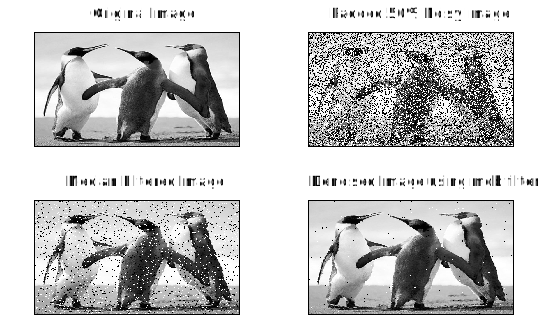

In [147]:
// mdb (MinMax Based Detector) filter

// Original Image
grayImg = rgb2gray(imread('penguines.jpg'));
subplot(221), title("Original Image"), imshow(grayImg);
mini = min(grayImg(:));
maxi = max(grayImg(:));

f = 0.5;

// Noised Image
d_im = imnoise(grayImg, 'salt & pepper', f);
subplot(222), title("Padded " + string(f*100) + "% Noisy Image"), imshow(d_im);

// algorithm
[r c] = size(d_im);
img1 = zeros(r+2, c+2, 'uint8');
img1(2:r+1, 2:c+1) = d_im(:,:);

// border padded image
img1(1, 1) = d_im(1, 1);
img1(r+2, 1) = d_im(r, 1);
img1(1, c+2) = d_im(1, c);
img1(r+2, c+2) = d_im(r, c);

img1(2:r+1, 1) = d_im(:,1); 
img1(2:r+1, c+2) = d_im(:,c);
img1(1, 2:c+1) = d_im(1,:);
img1(r+2, 2:c+1) = d_im(r,:);

subplot(223), title("Median Filtered Image"), imshow(immedian(d_im,3));

for i = 2:r+1
    for j = 2:c+1
        if img1(i,j) <= mini  | img1(i,j) >= maxi then
            img1(i,j) = gsort(img1(i-1:i+1, j-1:j+1))(5); 
        end
    end
end

subplot(224), title("Denoised Image using mdb filter"), imshow(img1(2:r+1, 2:c+1));


# **_Thank You_**